In [79]:
# Dependencies and setup
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2
import datetime
from config import password

In [82]:
from sqlalchemy import create_engine
engine = create_engine('postgresql+psycopg2://postgres:'+ password + '@localhost:5432/Employee_DB')
connection = engine.connect()

In [83]:
# Query all salaries
salary_info = pd.read_sql('SELECT * FROM salaries', connection)
salary_info.head(20)

,emp_no,salary,from_date,to_date
0,10001,60117.0,1986-06-26,1987-06-26
1,10002,65828.0,1996-08-03,1997-08-03
2,10003,40006.0,1995-12-03,1996-12-02
3,10004,40054.0,1986-12-01,1987-12-01
4,10005,78228.0,1989-09-12,1990-09-12
5,10006,40000.0,1990-08-05,1991-08-05
6,10007,56724.0,1989-02-10,1990-02-10
7,10008,46671.0,1998-03-11,1999-03-11
8,10009,60929.0,1985-02-18,1986-02-18
9,10010,72488.0,1996-11-24,1997-11-24


In [84]:
#Query all titles
title_info = pd.read_sql('SELECT * FROM titles', connection)
title_info = title_info.rename(columns={"to_date": "end_date"})
title_info.head()


,emp_no,title,from_date,end_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [29]:
# Combine the salary and titles tables
combined_data = pd.merge(salary_info, title_info, on= "emp_no", how="inner")
combined_data.head(10)

,emp_no,salary,from_date_x,to_date,title,from_date_y,end_date
0,10001,60117.0,1986-06-26,1987-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,65828.0,1996-08-03,1997-08-03,Staff,1996-08-03,9999-01-01
2,10003,40006.0,1995-12-03,1996-12-02,Senior Engineer,1995-12-03,9999-01-01
3,10004,40054.0,1986-12-01,1987-12-01,Engineer,1986-12-01,1995-12-01
4,10004,40054.0,1986-12-01,1987-12-01,Senior Engineer,1995-12-01,9999-01-01
5,10005,78228.0,1989-09-12,1990-09-12,Senior Staff,1996-09-12,9999-01-01
6,10005,78228.0,1989-09-12,1990-09-12,Staff,1989-09-12,1996-09-12
7,10006,40000.0,1990-08-05,1991-08-05,Senior Engineer,1990-08-05,9999-01-01
8,10007,56724.0,1989-02-10,1990-02-10,Senior Staff,1996-02-11,9999-01-01
9,10007,56724.0,1989-02-10,1990-02-10,Staff,1989-02-10,1996-02-11


In [47]:
# Convert end_date column from object to date

combined_data['year'] = pd.to_datetime(combined_data.end_date, errors = 'coerce')
combined_data.head(10)

,emp_no,salary,from_date_x,to_date,title,from_date_y,end_date,year
0,10001,60117.0,1986-06-26,1987-06-26,Senior Engineer,1986-06-26,9999-01-01,NaT
1,10002,65828.0,1996-08-03,1997-08-03,Staff,1996-08-03,9999-01-01,NaT
2,10003,40006.0,1995-12-03,1996-12-02,Senior Engineer,1995-12-03,9999-01-01,NaT
3,10004,40054.0,1986-12-01,1987-12-01,Engineer,1986-12-01,1995-12-01,1995-12-01
4,10004,40054.0,1986-12-01,1987-12-01,Senior Engineer,1995-12-01,9999-01-01,NaT
5,10005,78228.0,1989-09-12,1990-09-12,Senior Staff,1996-09-12,9999-01-01,NaT
6,10005,78228.0,1989-09-12,1990-09-12,Staff,1989-09-12,1996-09-12,1996-09-12
7,10006,40000.0,1990-08-05,1991-08-05,Senior Engineer,1990-08-05,9999-01-01,NaT
8,10007,56724.0,1989-02-10,1990-02-10,Senior Staff,1996-02-11,9999-01-01,NaT
9,10007,56724.0,1989-02-10,1990-02-10,Staff,1989-02-10,1996-02-11,1996-02-11


In [48]:
# Only want titles that are current so filter for NaT which can be treated as NULL
current_titles = combined_data[combined_data.year.isnull()]
current_titles.head()

,emp_no,salary,from_date_x,to_date,title,from_date_y,end_date,year
0,10001,60117.0,1986-06-26,1987-06-26,Senior Engineer,1986-06-26,9999-01-01,NaT
1,10002,65828.0,1996-08-03,1997-08-03,Staff,1996-08-03,9999-01-01,NaT
2,10003,40006.0,1995-12-03,1996-12-02,Senior Engineer,1995-12-03,9999-01-01,NaT
4,10004,40054.0,1986-12-01,1987-12-01,Senior Engineer,1995-12-01,9999-01-01,NaT
5,10005,78228.0,1989-09-12,1990-09-12,Senior Staff,1996-09-12,9999-01-01,NaT


In [49]:
# Group by title and get average salary
title_group = current_titles.groupby("title")

In [51]:
avg_salary = title_group["salary"].mean()

In [60]:
print(avg_salary)

title
Assistant Engineer    48437.0
Engineer              48532.0
Manager               49601.0
Senior Engineer       48502.0
Senior Staff          58512.0
Staff                 58449.0
Technique Leader      48533.0
dtype: float64


Text(0.5, 0, 'Title')

<Figure size 2880x2160 with 0 Axes>

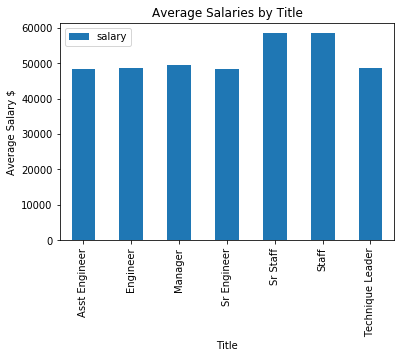

In [72]:
# Creat bar chart of avg salaries by titles
titles_df = pd.DataFrame({'title':["Asst Engineer", "Engineer", "Manager", "Sr Engineer", "Sr Staff", "Staff", "Technique Leader"],
                         'salary':[48437, 48532, 49601, 48502, 58512, 58449, 48533]})
plt.figure(figsize = (40, 30))
titles_df.plot.bar(x = 'title', y = 'salary')
plt.title("Average Salaries by Title")
plt.ylabel("Average Salary $")
plt.xlabel("Title")
